Dependecies: Add your Dependencies here

In [203]:
# !pip install dtreeviz
# import dtreeviz

In [204]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10
from statistics import mean, stdev 
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from scipy.stats import iqr

In [205]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset from the CSV file

In [206]:
dic = {'Serious_Dlq_in_2yrs':0,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.read_csv('/content/drive/My Drive/credit_scoring_sample.csv',na_filter=[" ","*"])
# df1 = pd.read_csv(file_path1,na_values=[" ","*"])
# data
print(data.dtypes)
data

Serious_Dlq_in_2yrs                     int64
Debt_Ratio                            float64
age                                     int64
Number_Of_Time_30-59_Days_Past_Due      int64
Number_Of_Time_60-89_Days_Past_Due      int64
Number_Of_Times_90_Days_Late            int64
Monthly_Income                        float64
Dependents                            float64
dtype: object


,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.0,0.0
995,0,0.019423,90,0,0,0,3500.0,0.0
996,0,0.173890,91,0,0,0,5767.0,0.0
997,0,32.000000,92,0,0,0,NaN,0.0


In [207]:
data['Monthly_Income'] = data['Monthly_Income'].replace(np.NaN, data['Monthly_Income'].mean())
data['Dependents'] = data['Dependents'].replace(np.NaN, int(data['Dependents'].mean()))
data

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,6182.567036,0.0
1,1,0.174377,22,1,1,1,280.000000,0.0
2,0,0.000000,22,0,0,0,1500.000000,0.0
3,1,0.000000,23,98,98,98,6182.567036,0.0
4,1,111.000000,23,0,1,2,6182.567036,0.0
...,...,...,...,...,...,...,...,...
994,0,0.065758,89,0,0,0,10416.000000,0.0
995,0,0.019423,90,0,0,0,3500.000000,0.0
996,0,0.173890,91,0,0,0,5767.000000,0.0
997,0,32.000000,92,0,0,0,6182.567036,0.0


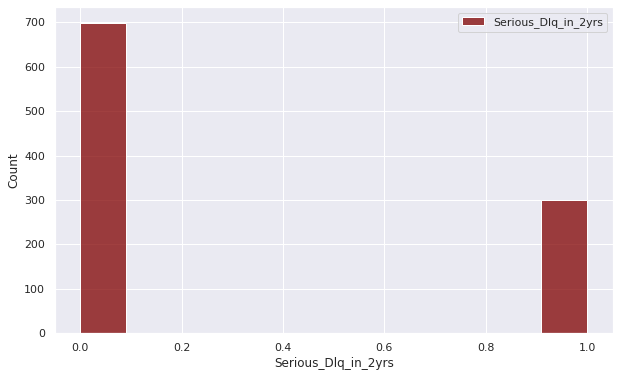

In [208]:
import seaborn as sns
sns.set( palette="deep", font_scale=1.0, rc={"figure.figsize": [10, 6]})
sns.histplot(data = data, x="Serious_Dlq_in_2yrs", color="maroon", label="Serious_Dlq_in_2yrs")
plt.legend() 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


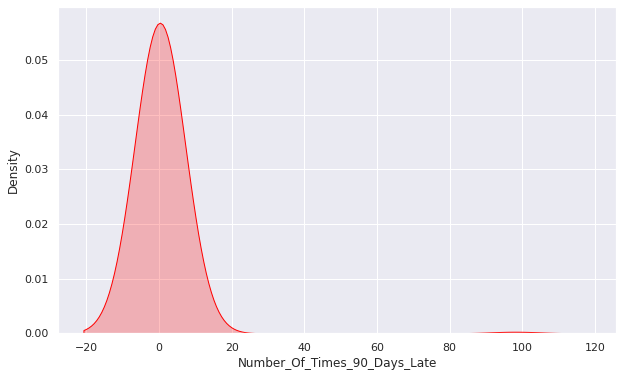

In [209]:
sns.kdeplot(data['Number_Of_Times_90_Days_Late'],bw=1,fill=True, color='red')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


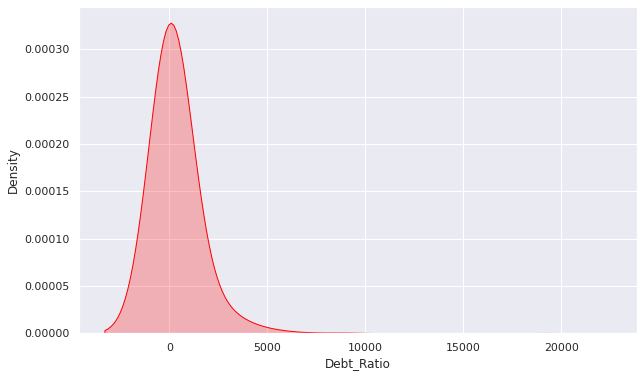

In [210]:
sns.kdeplot(data['Debt_Ratio'],bw=1,fill=True, color='red')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


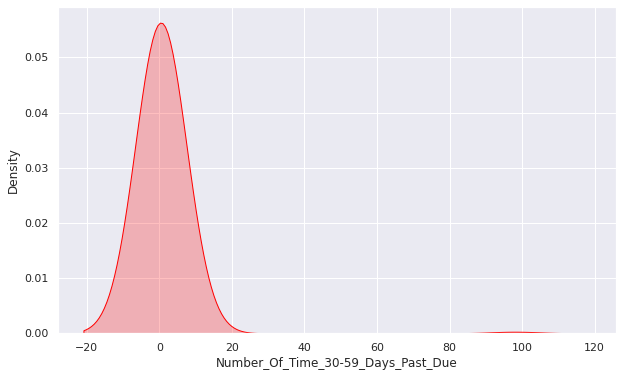

In [211]:
sns.kdeplot(data['Number_Of_Time_30-59_Days_Past_Due'],bw=1,fill=True, color='red')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


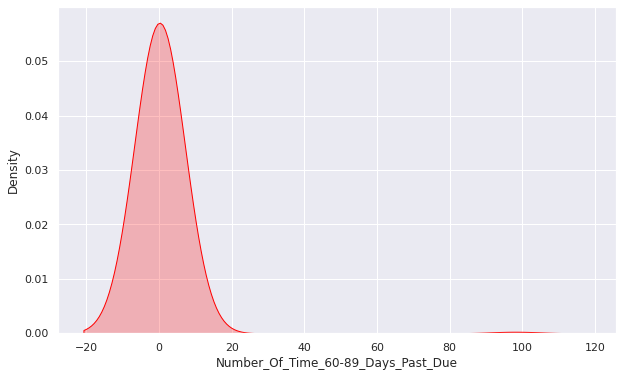

In [212]:
sns.kdeplot(data['Number_Of_Time_60-89_Days_Past_Due'],bw=1,fill=True, color='red')

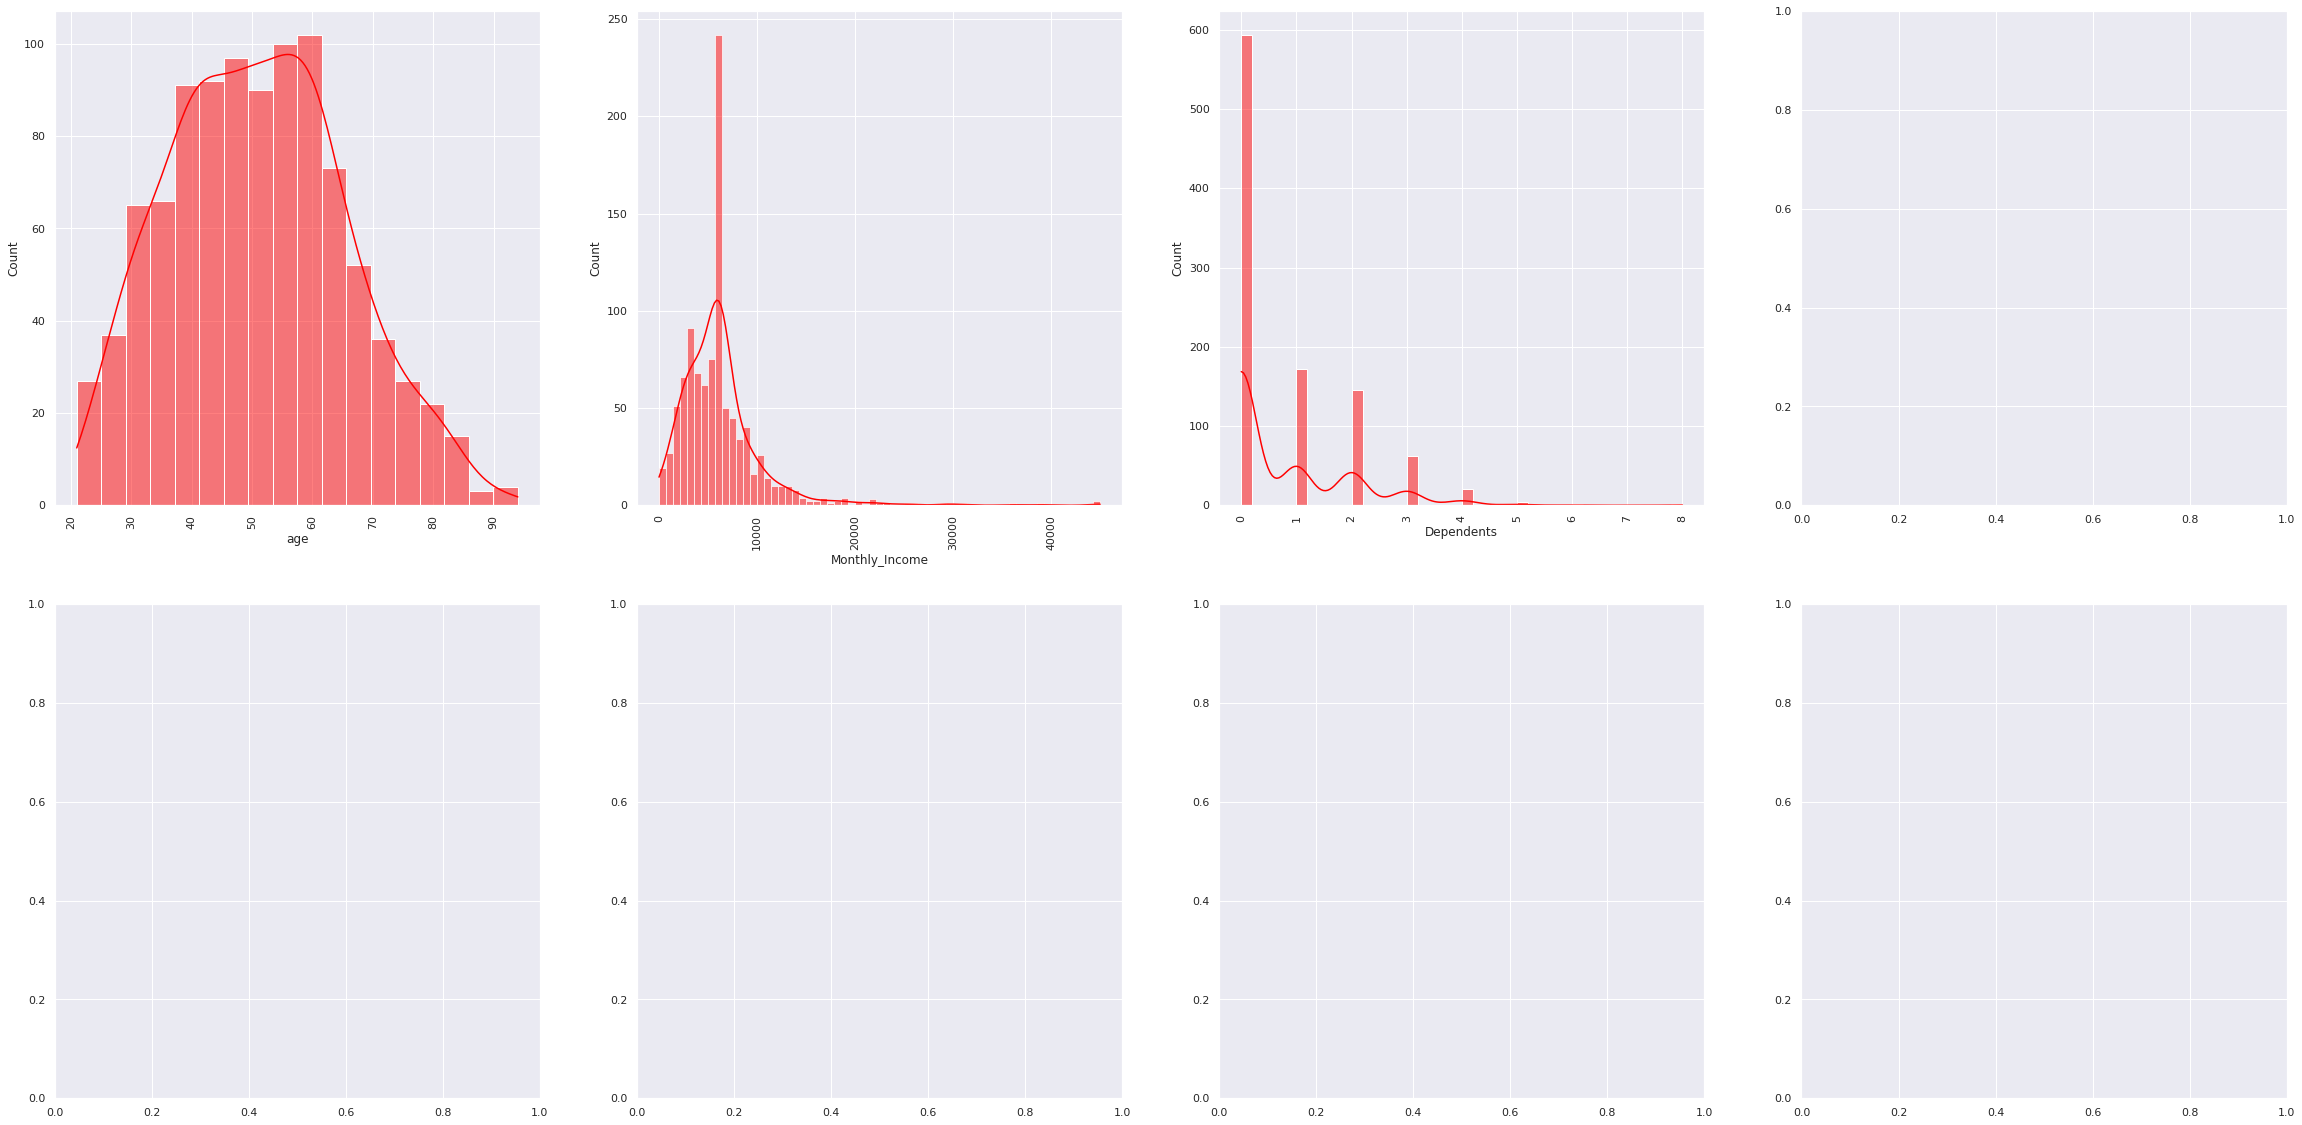

In [213]:
columns = ['age', 	'Monthly_Income',	'Dependents']
fig, ax = plt.subplots(2, 4, figsize=(40, 20))
for x, y in zip(columns, ax.flatten()):
    sns.histplot(data[x], ax=y, kde=True, color='red')
    for label in y.get_xticklabels():
        label.set_rotation(90)

In [214]:
X = data.drop('Serious_Dlq_in_2yrs', axis=1)
Y = data['Serious_Dlq_in_2yrs']

In [215]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
parameters = {'max_features': [1, 2, 4], 'max_depth': [2,3,4,5],'min_samples_leaf': [3, 5, 7, 9]}
rf = RandomForestClassifier(n_estimators=100)

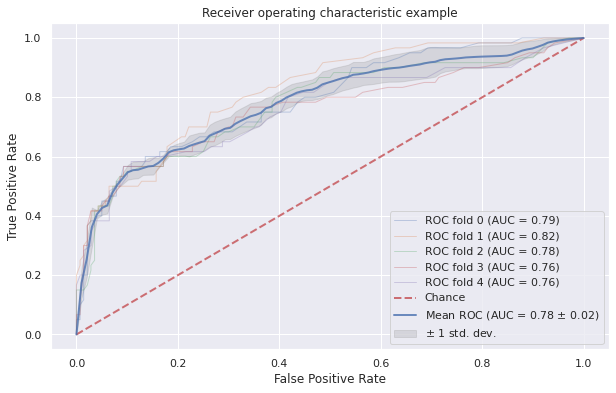

List of all accuracies obtained: [79.5, 80.5, 80.0, 75.5, 78.39195979899498]

Maximum Accuracy that can be obtained from this model is: 80.5 %

Minimum Accuracy that can be obtained from this model is: 75.5 %

Overall Accuracy: 78.778391959799 %

Standard Deviation is: 1.9921196166790274


In [216]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
accuracy_list = []
tpr = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(skf.split(X, Y)): 
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y[train], Y[test] 
    rf.fit(X_train, Y_train) 
    accuracy_list.append(rf.score(X_test, Y_test)*100)
    viz = plot_roc_curve(rf, X_test, Y_test,name='ROC fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tpr.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
mean_tpr = np.mean(tpr, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tpr, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()
print('List of all accuracies obtained:', accuracy_list) 
print('\nMaximum Accuracy that can be obtained from this model is:', 
      max(accuracy_list), '%') 
print('\nMinimum Accuracy that can be obtained from this model is:', 
      min(accuracy_list), '%') 
print('\nOverall Accuracy:', 
      mean(accuracy_list), '%') 
print('\nStandard Deviation is:', stdev(accuracy_list)) 

In [217]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30)
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(X_train, Y_train)
print("Best parameters: ",grid_search.best_params_) 
grid_predictions = grid_search.predict(X_test) 
print("Mean test score:", grid_search.cv_results_['mean_test_score'])
print(classification_report(Y_test, grid_predictions))

Best parameters:  {'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 7}
Mean test score: [0.81726697 0.82328746 0.81582361 0.8182889  0.81276113 0.82194183
 0.81932619 0.8213381  0.81284583 0.81306286 0.81805469 0.8105472
 0.81956006 0.81836744 0.81693272 0.82096847 0.81881924 0.81693176
 0.81989346 0.82000823 0.81543869 0.81676321 0.82107625 0.81903264
 0.822685   0.81805703 0.82218702 0.81984938 0.81782498 0.8153195
 0.82176569 0.82064082 0.81296004 0.81695048 0.81689942 0.81761442
 0.81863352 0.82167069 0.82574762 0.82378635 0.82053326 0.82016548
 0.81752875 0.82327906 0.81258431 0.81738678 0.81745276 0.81884373]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       203
           1       0.80      0.36      0.50        97

    accuracy                           0.76       300
   macro avg       0.78      0.66      0.67       300
weighted avg       0.77      0.76      0.73       300



In [218]:
print("Best Score:", grid_search.best_score_)

Best Score: 0.8257476225671347


Accuracy of best-estimator: 77.0


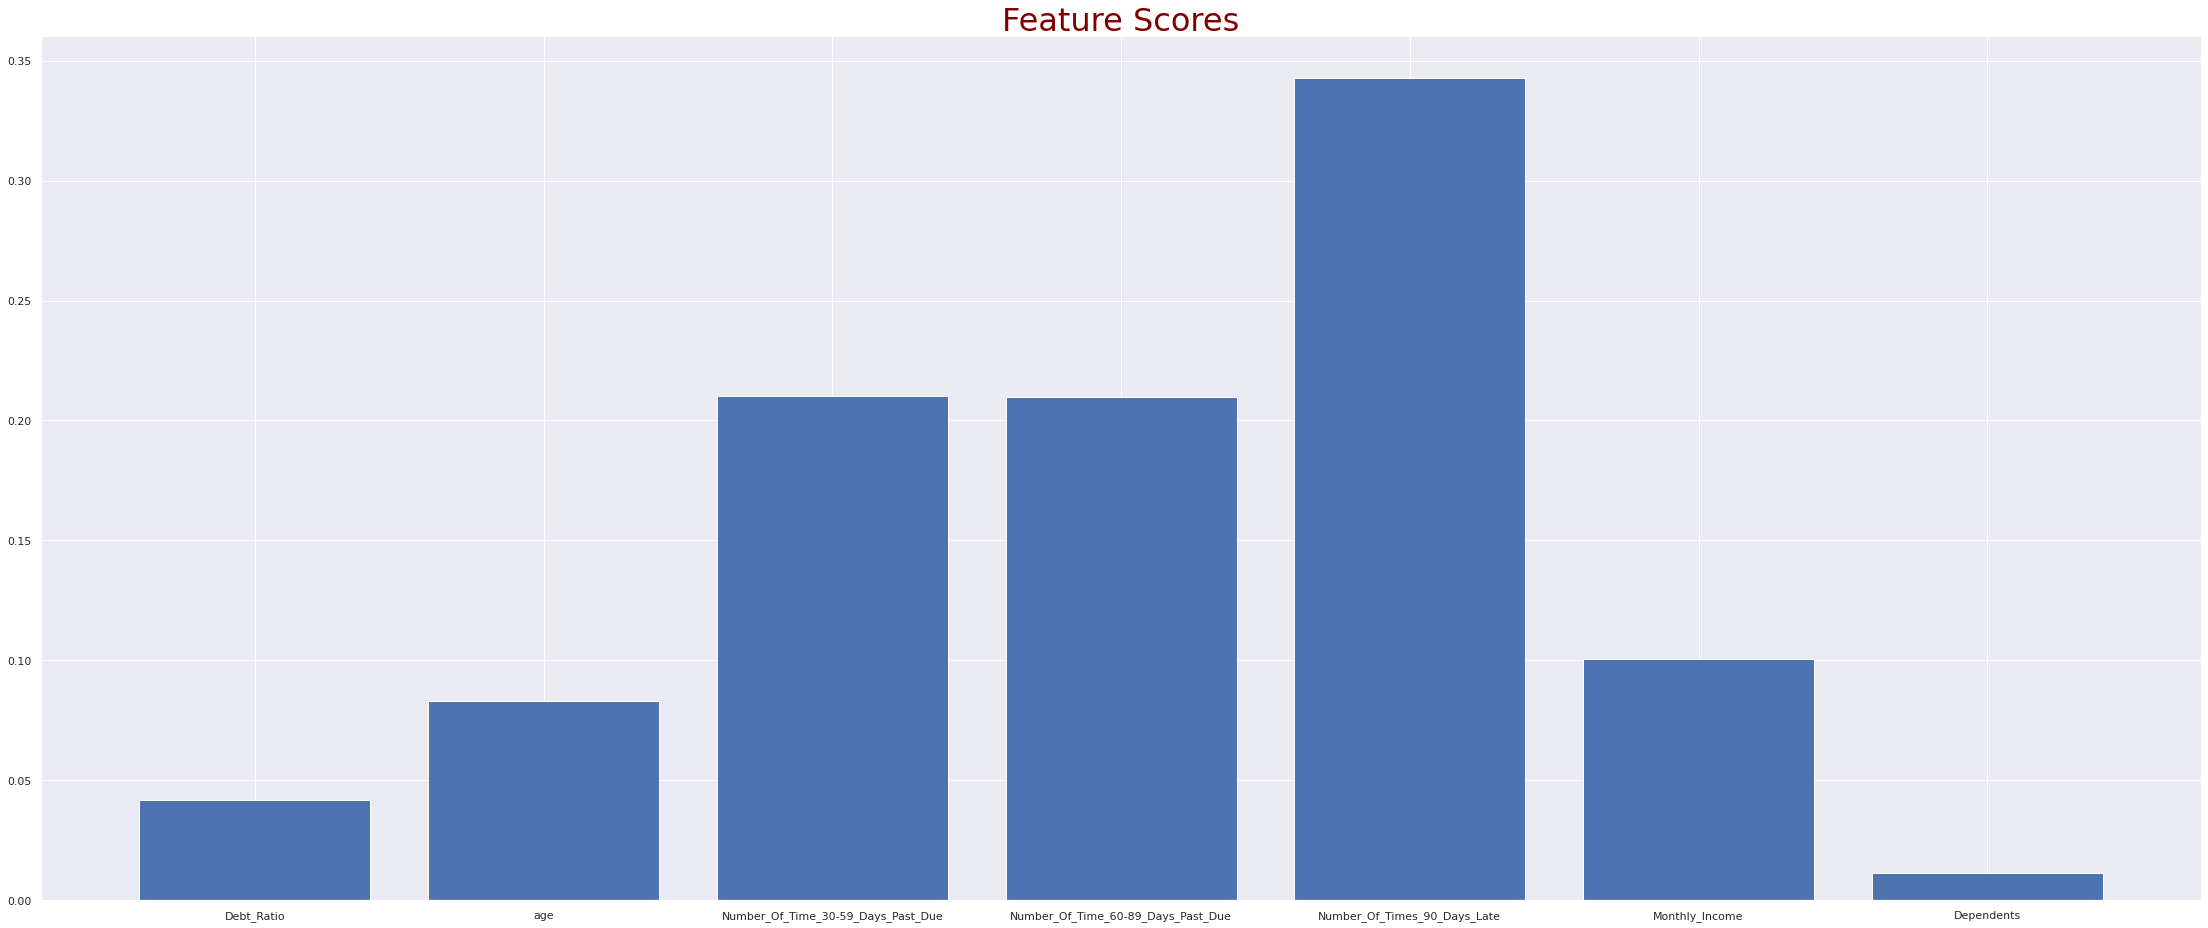

In [219]:

# print("Feature which has the weakest impact: ", columns[rf.feature_importances_.index(min(rf.feature_importances_))])
from sklearn.metrics import accuracy_score
A = ['Debt_Ratio', 'age', 'Number_Of_Time_30-59_Days_Past_Due',	'Number_Of_Time_60-89_Days_Past_Due',	'Number_Of_Times_90_Days_Late',	'Monthly_Income',	'Dependents']
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
clf = RandomForestClassifier(max_depth= 4, max_features= 2, min_samples_leaf= 9)
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print("Accuracy of best-estimator:", 100*accuracy_score(Y_test, pred))
scores = clf.feature_importances_
ax.bar(A, scores)
plt.title(label="Feature Scores", fontsize=32,color='maroon')
plt.show()

In [220]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
def get_models():
  model2 = BaggingClassifier(base_estimator=None, n_estimators = 2)
  model3 = BaggingClassifier(base_estimator=None, n_estimators = 3)
  model4 = BaggingClassifier(base_estimator=None, n_estimators = 4)
  models = [model2, model3, model4]
  return models

In [221]:
result_matrix = []
def evaluate_model(model, X, Y):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
  scores = []
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots()
  for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
      X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
      Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
      model.fit(X_train_fold, Y_train_fold) 
      scores.append(model.score(X_test_fold, Y_test_fold)*100)
      viz = plot_roc_curve(model, X_test_fold, Y_test_fold,
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
  ax.legend(loc="lower right")
  plt.show()
  result_matrix.append(scores)
  print("\nScores:", scores)
  print("Mean: %.5f"%mean(scores))
  print("Standard Deviation: %.5f\n"%stdev(scores))

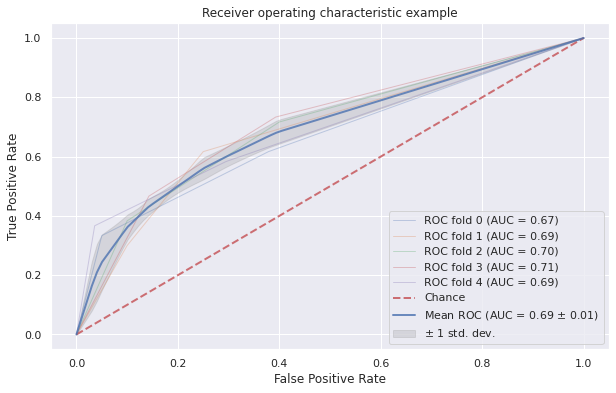


Scores: [76.5, 72.0, 74.5, 74.0, 78.39195979899498]
Mean: 75.07839
Standard Deviation: 2.44820



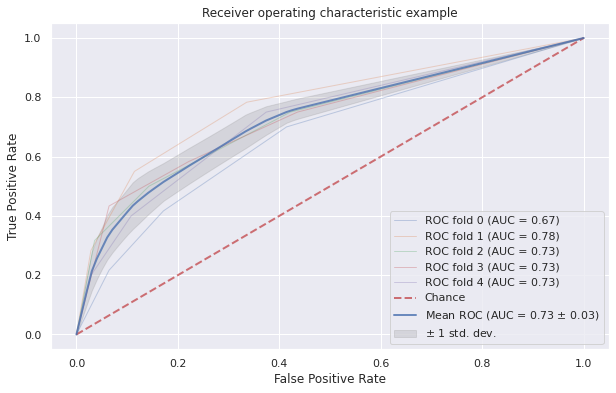


Scores: [70.5, 78.5, 75.0, 72.0, 74.37185929648241]
Mean: 74.07437
Standard Deviation: 3.06638



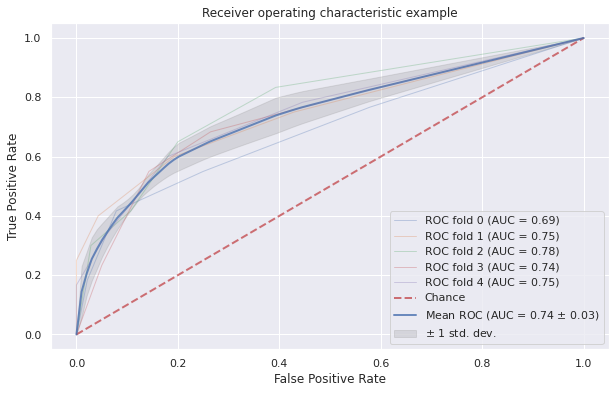


Scores: [77.0, 79.0, 75.0, 76.5, 75.87939698492463]
Mean: 76.67588
Standard Deviation: 1.49837



In [222]:
models = get_models()
for i in range(len(models)):
  evaluate_model(models[i],X,Y)

[[76.5, 72.0, 74.5, 74.0, 78.39195979899498], [70.5, 78.5, 75.0, 72.0, 74.37185929648241], [77.0, 79.0, 75.0, 76.5, 75.87939698492463]]


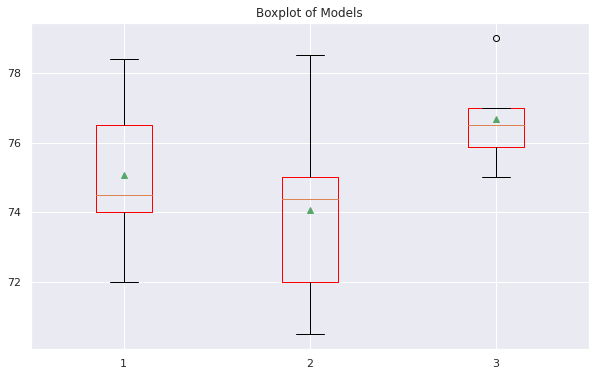

2.5
3.0
1.1206030150753747


In [223]:
# Plot the model performance for comparison using boxplot
print(result_matrix)
plt.boxplot(result_matrix, boxprops=dict(color='red'), showmeans=True)
plt.title('Boxplot of Models');
plt.show()
print(iqr(result_matrix[0]))
print(iqr(result_matrix[1]))
print(iqr(result_matrix[2]))

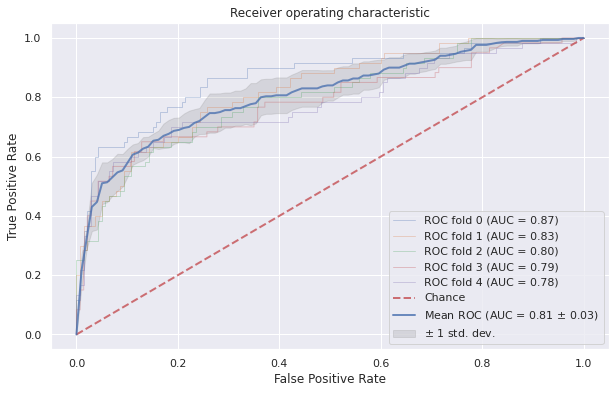


Scores: [83.0, 79.0, 78.0, 80.0, 79.39698492462311]
Mean: 79.87940
Standard Deviation: 1.89017



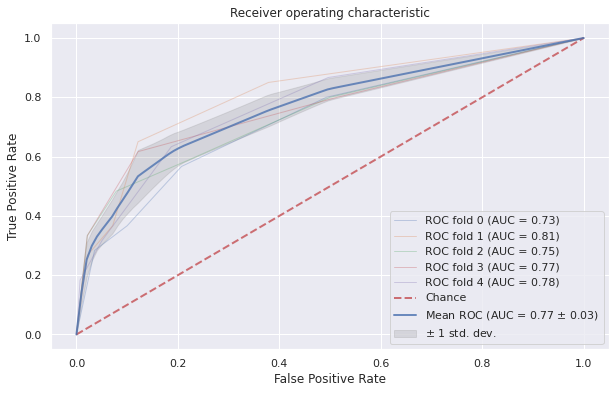


Scores: [74.0, 76.0, 79.0, 80.0, 75.87939698492463]
Mean: 76.97588
Standard Deviation: 2.46236



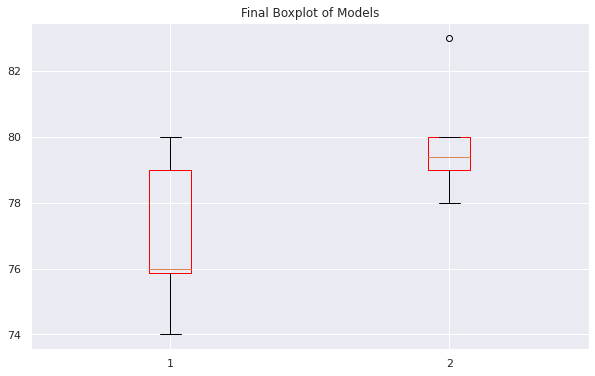

In [224]:
# Compare the best performance of bagging with random forest
# the third model has lower iqr which means less variability. Also, it has higher mean accuracy so we go with it
result_matrix1=[]
def evaluate_model1(model, X, Y):
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
  scores = []
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots()
  for i, (train_index, test_index) in enumerate(skf.split(X, Y)): 
      X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
      Y_train_fold, Y_test_fold = Y[train_index], Y[test_index] 
      model.fit(X_train_fold, Y_train_fold) 
      scores.append(model.score(X_test_fold, Y_test_fold)*100)
      viz = plot_roc_curve(model, X_test_fold, Y_test_fold,
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)
  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")
  ax.legend(loc="lower right")
  plt.show()
  result_matrix1.append(scores)
  print("\nScores:", scores)
  print("Mean: %.5f"%mean(scores))
  print("Standard Deviation: %.5f\n"%stdev(scores))
evaluate_model1(clf, X, Y)
evaluate_model1(models[2], X, Y)
Random_Forest = result_matrix1[0]
Best_Bagged_Model = result_matrix1[1]
Final_Result = [Best_Bagged_Model, Random_Forest]
plt.boxplot(Final_Result, boxprops=dict(color='red'))
plt.title('Final Boxplot of Models');
plt.show()

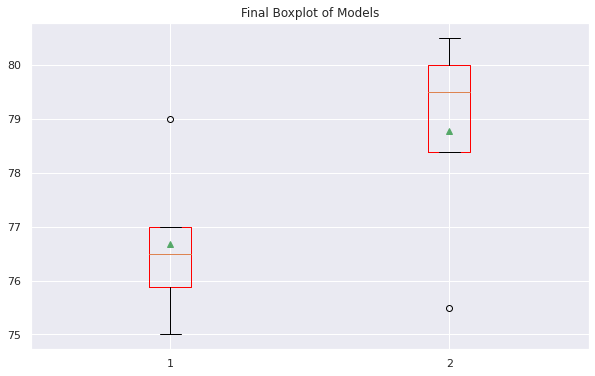

In [225]:
# Compare the best performance of bagging with random forest
# the third model has lower iqr which means less variability. Also, it has higher mean accuracy so we go with it
Random_Forest = accuracy_list
Best_Bagged_Model = result_matrix[2]
Final_Result = [Best_Bagged_Model, Random_Forest]
plt.boxplot(Final_Result, boxprops=dict(color='red'),showmeans=True,showbox=True)
plt.title('Final Boxplot of Models');
plt.show()